In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the data
file_path = '../survey.csv'
data = pd.read_csv(file_path)
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [20]:
# only select data from the United States
data_us = data[data['Country'] == 'United States']
data_us.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN


In [21]:
#what data is included in this dataset? see what the columns are
data_us.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [29]:
#only select the columns that I am interested in for now 'treatment', 'work_interfere', 'remote_work'
data_us_simple = data_us[['treatment', 'work_interfere', 'remote_work']]
data_us_simple.head()

,treatment,work_interfere,remote_work
0,Yes,Often,No
1,No,Rarely,No
4,No,Never,Yes
5,No,Sometimes,No
6,Yes,Sometimes,Yes


In [63]:
#create a pivot table to see how many participants sought mental health treatment grouped by those who work remotely
summary = data_us_simple.pivot_table(index='remote_work', columns='treatment', aggfunc='size', fill_value=0)
summary

treatment,No,Yes
remote_work,,
No,237,276
Yes,104,134


In [65]:
#convert to percents to standardize the values among remote work groups
summary_percents = summary.div(summary.sum(axis=1), axis=0) * 100
summary_percents

treatment,No,Yes
remote_work,,
No,46.198830,53.801170
Yes,43.697479,56.302521


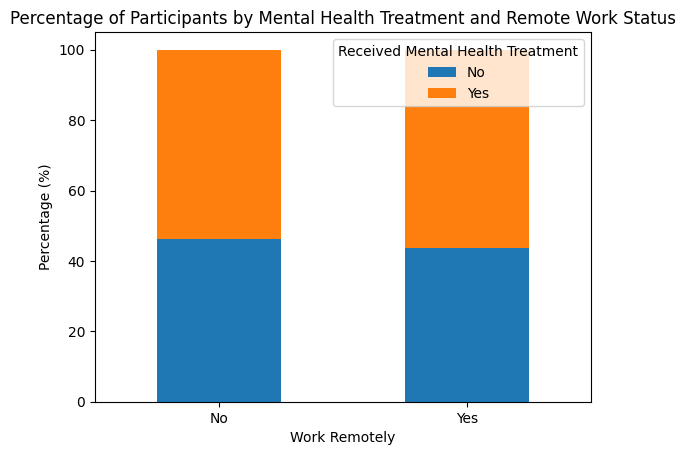

In [81]:
#plot
summary_percents.plot(kind='bar', stacked=True)
plt.title('Percentage of Participants by Mental Health Treatment and Remote Work Status')
plt.xlabel('Work Remotely')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Received Mental Health Treatment', loc='upper right')
plt.show()

## Analysis
The percentage of participants who seek mental health treatment 

In [74]:
summary2 = data_us_simple.pivot_table(index='treatment', columns='work_interfere', aggfunc='size', fill_value=0)
summary2

work_interfere,Never,Often,Rarely,Sometimes
treatment,,,,
No,107,8,26,57
Yes,18,74,85,232


In [75]:
summary2_percents = summary2.div(summary2.sum(axis=1), axis=0) * 100
summary2_percents

work_interfere,Never,Often,Rarely,Sometimes
treatment,,,,
No,54.040404,4.040404,13.131313,28.787879
Yes,4.400978,18.092910,20.782396,56.723716


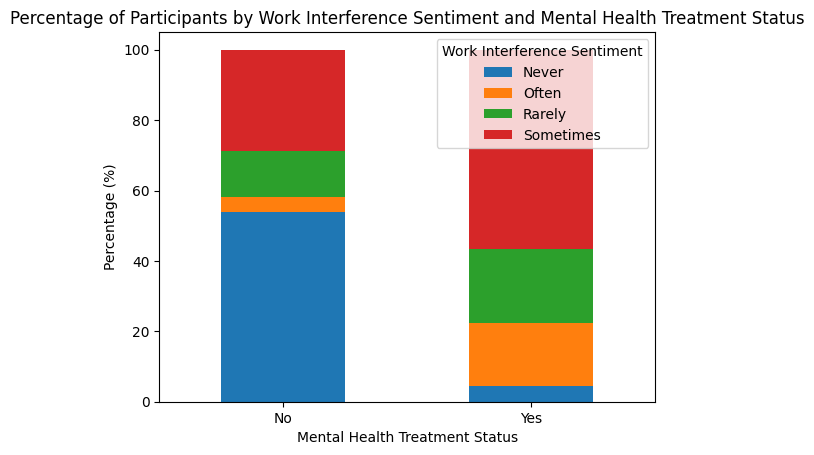

In [82]:
summary2_percents.plot(kind='bar', stacked=True)
plt.title('Percentage of Participants by Work Interference Sentiment and Mental Health Treatment Status')
plt.xlabel('Mental Health Treatment Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Work Interference Sentiment')
plt.show()